# Episode 13 — Understanding Qubit and Bit Ordering in Qiskit

Correctly interpreting **qubit and bit ordering** is essential to avoid confusion when working with Qiskit. In this episode, we will:
- Inspect internal indexing of qubits and classical bits.
- Compare visual diagram ordering vs internal indexing.
- Understand bit significance when converting results to integers.
- Explore statevector ordering.
- Control and target conventions for gates.
- Reverse ordering intentionally.

## 1. Internal qubit indexing
The `QuantumCircuit` class stores qubits in a list, and their **index** in this list determines their label in code.

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
print(qc.qubits)  # Internal list of qubits
print(f"Qubit 0 object: {qc.qubits[0]}")
print(f"Qubit 2 object: {qc.qubits[2]}")

[<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>]
Qubit 0 object: <Qubit register=(3, "q"), index=0>
Qubit 2 object: <Qubit register=(3, "q"), index=2>


## 2. Visual ordering in diagrams
By default, **qubit 0 is drawn at the top**. This is purely a display convention — it doesn't change the logical order.

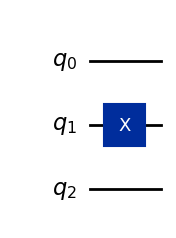

In [2]:
qc.x(1)  # Apply X to qubit 1
qc.draw(output='mpl')

## 3. Reverse diagram display order
`reverse_bits=True` only flips the visual display order.

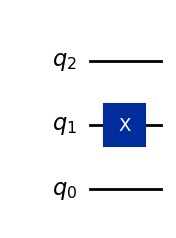

In [3]:
qc.draw(output='mpl', reverse_bits=True)

## 4. Bit significance for integers
When converting to integers:
- Bit 0 is the **least significant bit** (value 2^0).
- Bit n-1 is the **most significant bit** (value 2^(n-1)).

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

qc2 = QuantumCircuit(2, 2)
qc2.x(1)
qc2.measure([0, 1], [0, 1])

backend = AerSimulator()
qc2_t = transpile(qc2, backend)
result = backend.run(qc2_t, shots=1000).result()
print(result.get_counts())


{'10': 1000}


## 5. Strings: MSB on the left
Strings are printed with the **most significant bit on the left**. For a 2-qubit system:
- `10` means qubit 1 = 1, qubit 0 = 0.

In [4]:
from qiskit.quantum_info import Statevector

sv = Statevector.from_label("0+")
print(sv.probabilities_dict())

{np.str_('00'): np.float64(0.4999999999999999), np.str_('01'): np.float64(0.4999999999999999)}


In [24]:
sv.draw("latex")


<IPython.core.display.Latex object>

> Try to changing the output to `text`, `latex`, `latex_source`, `qsphere`, `hinton`, `bloch`, `city`, or `paulivec`.

## 6. Statevector ordering
The amplitude at index `x` corresponds to the computational basis state `|x⟩`.

In [14]:
print(sv[1])  # amplitude for |01>
print(sv[2])  # amplitude for |10>

(0.7071067811865475+0j)
0j


## 7. Controlled gate conventions
By default, `cx(control, target)` means control first, target second.

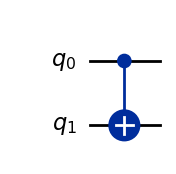

In [15]:
qc3 = QuantumCircuit(2)
qc3.cx(0, 1)
qc3.draw(output='mpl')

## 8. Reversing logical qubit order
`reverse_bits()` returns a new circuit where qubit labels are reversed **logically** — changing which qubits operations apply to.

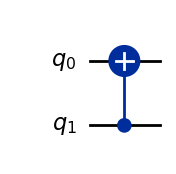

In [16]:
rev_qc = qc3.reverse_bits()
rev_qc.draw(output='mpl')

## Summary
- Internal index vs. diagram order.
- LSB/MSB significance in integers and strings.
- Computational basis indexing for statevectors.
- Controlled gate argument order.
- How to intentionally reverse ordering.

## Additional information

**Created by:** Ricard Santiago Raigada García

**Version:** 1.0.0